In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


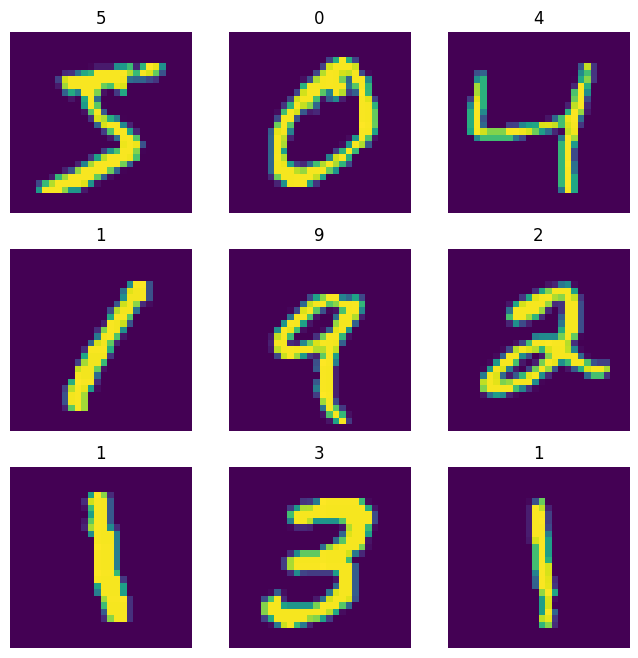

In [5]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis =0)
x_test = tf.keras.utils.normalize(x_test, axis =0)

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics =['accuracy'])

In [10]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs = 20)


Epoch 1/20


c:\Python\Hand_Written_Digit_Recognition\venv\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 30s 12ms/step - loss: 0.6214 - accuracy: 0.8149 - val_loss: 0.4319 - val_accuracy: 0.9027
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2700 - accuracy: 0.9211 - val_loss: 0.3214 - val_accuracy: 0.9300
Epoch 3/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1991 - accuracy: 0.9416 - val_loss: 0.2866 - val_accuracy: 0.9388
Epoch 4/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1552 - accuracy: 0.9534 - val_loss: 0.2380 - val_accuracy: 0.9498
Epoch 5/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1271 - accuracy: 0.9621 - val_loss: 0.2193 - val_accuracy: 0.9542
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1055 - accuracy: 0.9683 - val_loss: 0.1999 - val_accuracy: 0.9628
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0899 - accuracy: 0.9726 - val_loss: 0.2044 - val_accuracy: 0

In [11]:
import cv2

In [12]:
image = cv2.imread('1.png')[:,:,0]
image = np.invert(np.array([image]))

1/1 [==============================] - 0s 269ms/step
1


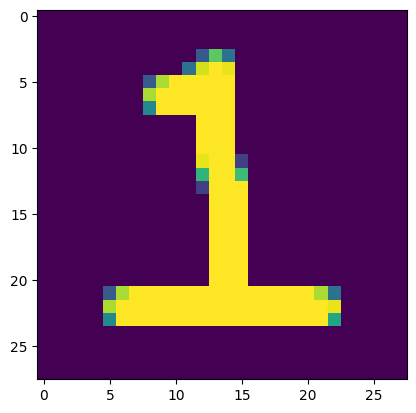

In [13]:
output = model.predict(image)
plt.imshow(image[0])
print(np.argmax(output))

In [14]:
model.save('Hand_Written_Digit_Recognition_Model.keras')